# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the TMDb dataset for this analysis. The dataset was downloaded from the link given and I have the .csv file on my project folder.  

#### Given the following features of this data set
> id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords
> overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj


#### The relevant questions to ask include;
* Which genres are most popular from year to year?
* What kind of properties are associated with movies that has high revenues?

In [189]:
# Import statements for pandas, numpy and matplotlib packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [190]:
# read movie data into a data frame
df = pd.read_csv('movie.csv')

# load the first 5 rows of dataframe to see data structure
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### General Properties of the data
To find the general properties of the movie data, I will be looking at the following
1. What data types the features of the dataset has using the `dtypes` method
2. The number of non null columns for each column using the `info()` method
3. The number of unique values available in each column using the `nunique` method
4. Get more insight as to mean, median, 25 percentile, 50 percentile, and 75 percentile, using the `describe()` method
5. Know the number of rows and columns available on the data set using the `shape` method
6. Calculate the number of null values of each column using the `isnull()` method
7. Check for the sum of duplicate data I have on the dataframe using the `duplicated()` method

In [191]:
# list all the data types of the columns/features for the movies data
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [192]:
# check for columns that possibly have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [16]:
# get the number of non null unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [193]:
# View the min, 25%, 50%, 75%, max values with Pandas describe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [194]:
# display the number of rows and columns available in dataset
df.shape

(10866, 21)

In [195]:
# calculate the sum of null values for each feature/column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [24]:
# find the number of duplicate data on dataset
df.duplicated().sum()

1

### Data Cleaning 
A couple of problems can be observed with this data after accessing the dataset which include
1. Some columns are not useful for our data analysis. They are not required in answering the questions we raised from the dataset
2. The release_date column has a data type of string. For a date column, a data type of datetime object would be better.
3. The dataset contains a lot of null values which can be observed on the following columns `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `production_companies`, `genres`, `overview`. 
4. The dataset has one duplicate data

All of the problems listed above woud be fixed to get a better quality data set to work with. This is done subsequently below. 
1. The columns that are not relevant to the questions we want to answer can be dropped. A couple of columns that fall into this category include `homepage`, `tagline` and `keywords`
2. Update the data type for `release_date` to datetime
3. Delete rows with null values
4. Delete duplicate data


In [38]:
# drop homepage, tagline and keywords column
df.drop(['homepage', 'tagline', 'keywords'], axis = 1, inplace = True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [42]:
# update the data type for release_date column
df['release_date'] = pd.to_datetime(df['release_date'])
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [45]:
# drop rows with missing values
df.dropna(inplace = True)

In [46]:
# confirm that all null rows has been dropped. This should give 0
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [47]:
# drop duplicate data from dataframe
df.drop_duplicates(inplace = True)

In [48]:
# confirm that there is no more duplicate in dataset
df.duplicated().sum()

0

In [110]:
# find the new size of the rows and columns of dataset after cleaning
df.shape

(9770, 18)

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

In order to answer this question, We did some analysis below. We grouped the dataset by `release_year` and `genres`, then saved it in a new dataframe `df_grouped_data`. After which we will check for the popularity of this dataframe using describe() method.

In [108]:
# check out more details on the release_year
df.describe().release_year

count    9770.000000
mean     2000.876766
std        13.037610
min      1960.000000
25%      1994.000000
50%      2005.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

In [ ]:
# Plot the histogram for release_year column
df['release_year'].hist();

In [126]:
# group the dataset by the year they were released
df.groupby(['release_year']).mean()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18191.866667,0.430438,1.537900e+06,1.125734e+07,119.866667,79.833333,6.433333,1.121877e+07,8.212073e+07
1962,16400.700000,0.465245,1.824071e+06,7.185995e+06,125.833333,78.800000,6.386667,1.314872e+07,5.179988e+07
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,16662.317073,0.421091,9.630039e+05,8.316629e+06,111.195122,76.243902,6.224390,6.770175e+06,5.846812e+07
1965,17226.411765,0.352522,2.064856e+06,1.347300e+07,119.294118,53.235294,6.188235,1.428997e+07,9.324072e+07
1966,16079.681818,0.308457,1.308064e+06,1.925834e+06,108.590909,32.318182,6.086364,8.787591e+06,1.293778e+07
1967,15878.027778,0.511007,2.795889e+06,2.049541e+07,109.416667,84.611111,6.319444,1.827607e+07,1.339736e+08
1968,17699.027027,0.506612,1.944297e+06,7.154945e+06,110.540541,113.351351,6.370270,1.218873e+07,4.485409e+07


In [196]:
# group the dataset by the year and genres, then find the popularity
df.groupby(['release_year', 'genres']).mean().popularity

release_year  genres                                
1960          Action|Adventure|Drama|History|Western    0.310398
              Action|Adventure|Western                  1.872132
              Action|Drama|Foreign|History|War          0.194948
              Action|Drama|History                      1.136943
              Action|Drama|History|War                  0.256779
                                                          ...   
2015          War|Action                                0.356519
              War|Adventure|Science Fiction             5.476958
              War|Drama                                 0.561032
              Western|Drama                             0.747541
              Western|Drama|Adventure|Thriller          9.110700
Name: popularity, Length: 6099, dtype: float64

In [197]:
# save the data grouped by genres and release year into a new dataframe
df_grouped_data = df.groupby(['release_year', 'genres']).mean()
# describe the popularity for the grouped data
df_grouped_data.describe().popularity

count    6099.000000
mean        0.709302
std         1.072688
min         0.000065
25%         0.236812
50%         0.429246
75%         0.766968
max        30.702849
Name: popularity, dtype: float64

From the above, it is observed that the median of `popularity` = 0.462325, while the mean = 0.752610
To answer the question which genres are more popular from year to year, we can check for the genres that are most popular by comparing the popularity from year to year with >= the median value. 

This is as seen below


In [253]:
most_popular = df_grouped_data.query('popularity >= 0.462325')
most_popular

id  popularity  \
release_year genres                                                            
1960         Action|Adventure|Western                      966.0    1.872132   
             Action|Drama|History                          967.0    1.136943   
             Adventure|Family                            18444.0    0.465879   
             Comedy|Drama|Romance                        13025.5    0.668774   
             Comedy|Romance                              21493.5    0.465497   
...                                                          ...         ...   
2015         Thriller|Science Fiction|Action|Adventure  307663.0    1.872696   
             War|Adventure|Science Fiction              131634.0    5.476958   
             War|Drama                                  316042.0    0.561032   
             Western|Drama                              354110.0    0.747541   
             Western|Drama|Adventure|Thriller           281957.0    9.110700   

                                                             budget  \
release_year genres                                                   
1960         Action|Adventure|Western                     2000000.0   
             Action|Drama|History                        12000000.0   
             Adventure|Family                                   0.0   
             Comedy|Drama|Romance                         1500000.0   
             Comedy|Romance                               1500000.0   
...                                                             ...   
2015         Thriller|Science Fiction|Action|Adventure   10000000.0   
             War|Adventure|Science Fiction              160000000.0   
             War|Drama                                          0.0   
             Western|Drama                               11000000.0   
             Western|Drama|Adventure|Thriller           135000000.0   

                                                            revenue  runtime  \
release_year genres                                                            
1960         Action|Adventure|Western                     4905000.0    128.0   
             Action|Drama|History                        60000000.0    197.0   
             Adventure|Family                                   0.0    126.0   
             Comedy|Drama|Romance                        15500000.0    114.5   
             Comedy|Romance                               3550000.0    102.5   
...                                                             ...      ...   
2015         Thriller|Science Fiction|Action|Adventure          0.0     96.0   
             War|Adventure|Science Fiction              650523427.0    136.0   
             War|Drama                                          0.0    120.0   
             Western|Drama                                      0.0     90.0   
             Western|Drama|Adventure|Thriller           532950503.0    156.0   

                                                        vote_count  \
release_year genres                                                  
1960         Action|Adventure|Western                        224.0   
             Action|Drama|History                            211.0   
             Adventure|Family                                 47.0   
             Comedy|Drama|Romance                            123.5   
             Comedy|Romance                                   14.0   
...                                                            ...   
2015         Thriller|Science Fiction|Action|Adventure       181.0   
             War|Adventure|Science Fiction                  2380.0   
             War|Drama                                        29.0   
             Western|Drama                                    53.0   
             Western|Drama|Adventure|Thriller               3929.0   

                                                        vote_average  \
release_year genres                                                    
1

In [258]:
# pick the max value of popularity for each year
most_popular = most_popular.iloc[:,:2]
most_popular

id  popularity
release_year genres                                                         
1960         Action|Adventure|Western                      966.0    1.872132
             Action|Drama|History                          967.0    1.136943
             Adventure|Family                            18444.0    0.465879
             Comedy|Drama|Romance                        13025.5    0.668774
             Comedy|Romance                              21493.5    0.465497
...                                                          ...         ...
2015         Thriller|Science Fiction|Action|Adventure  307663.0    1.872696
             War|Adventure|Science Fiction              131634.0    5.476958
             War|Drama                                  316042.0    0.561032
             Western|Drama                              354110.0    0.747541
             Western|Drama|Adventure|Thriller           281957.0    9.110700

[2841 rows x 2 columns]

### What kind of properties are associated with movies that has high revenues?

Group revenue by `release_year`. Adding the count makes us know how many movies are released in each year.

In [208]:
counts = df.groupby('release_year').count()['id']
counts

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

Plot a bar chart of release year against the count of movies produced in each year. From the bar chart we can see that movie production increased over the years.

Text(0, 0.5, 'Counts')

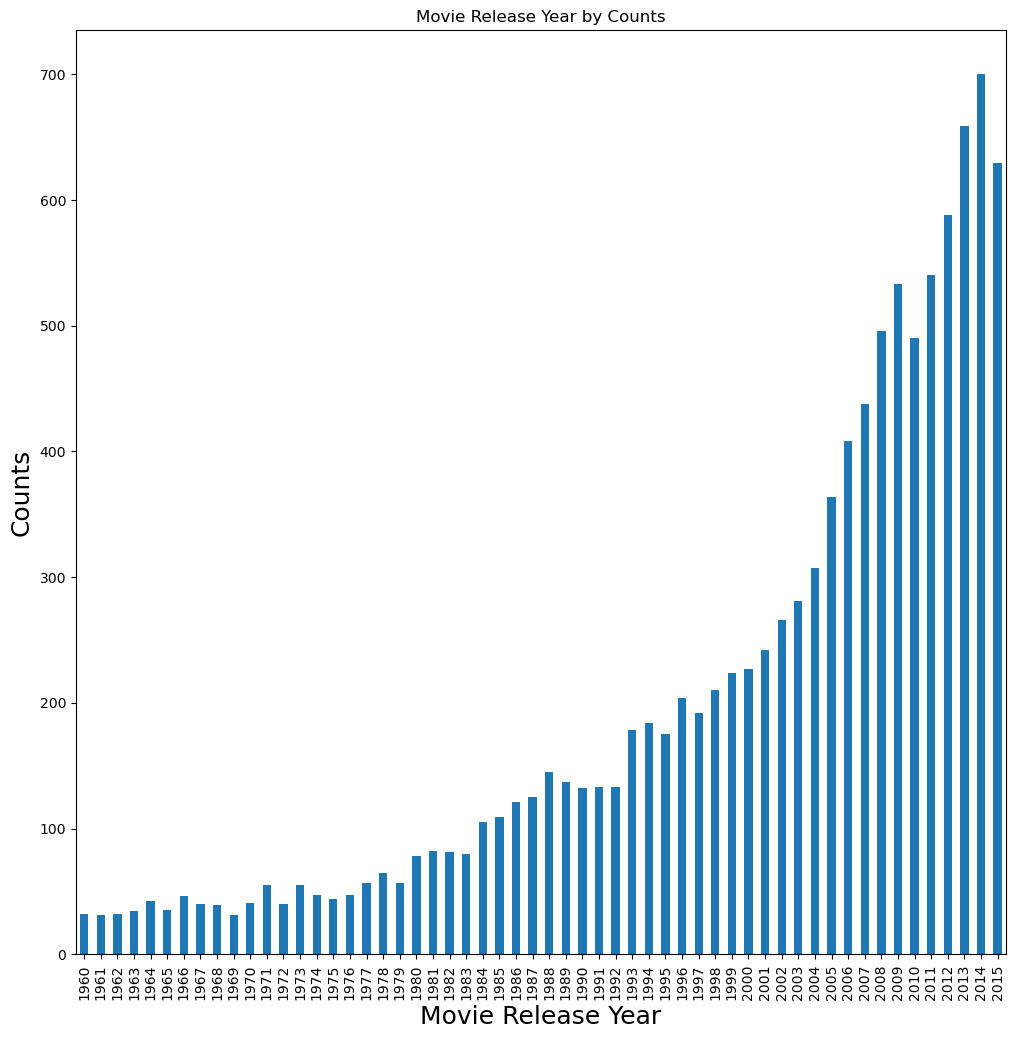

In [212]:
counts.plot(kind = 'bar', title = "Movie Release Year by Counts", figsize=(12, 12));

plt.xlabel('Movie Release Year', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)


In [213]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the histograms of the features below, we can see that the `release year` is left skewed and the `release_date` is right skewed. Also, the `revenue` feature is right skewed.

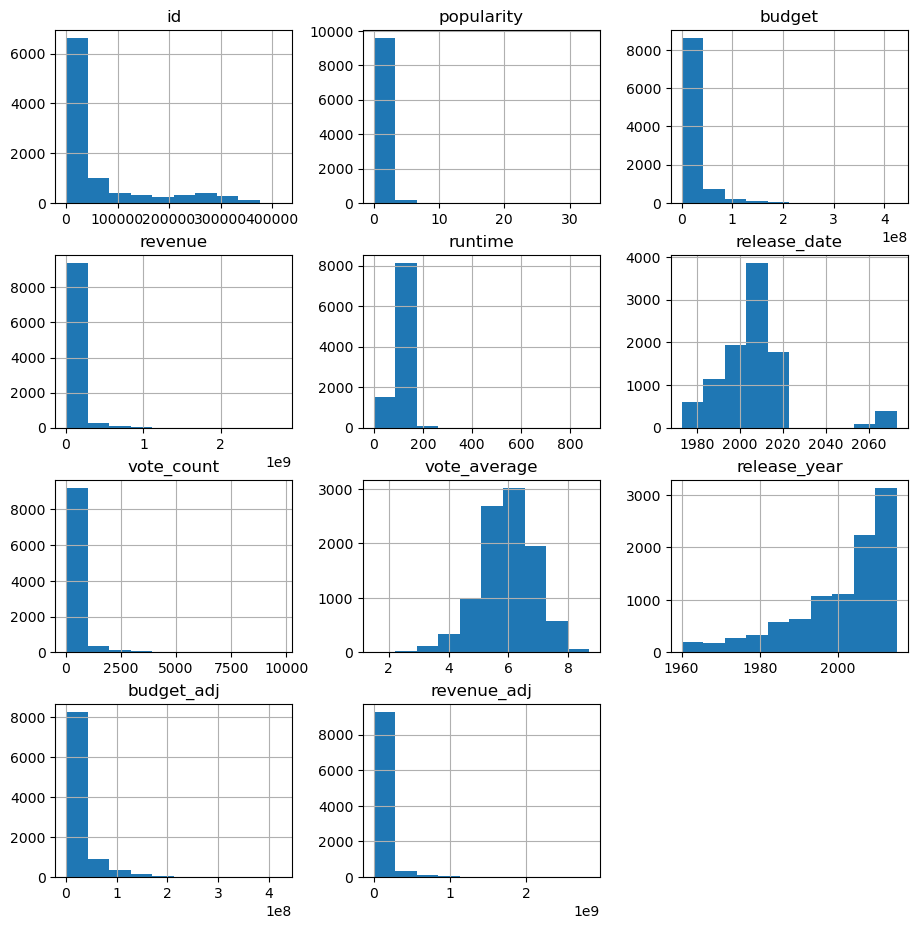

In [143]:
df.hist(figsize = (11, 11));

#### Summary of findings from the plots below
Below, in other to check the correlation of revenue with some other features of the dataset, I plotted scatter plots of `revenue` against `popularity`, `release_year` and `vote_count`.

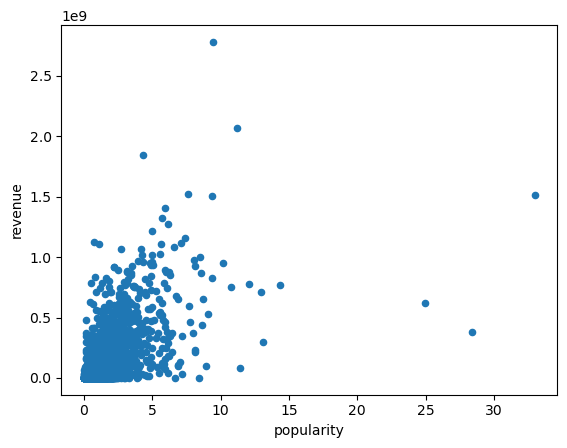

In [216]:
df.plot(x = 'popularity', y = 'revenue', kind = 'scatter');

From the plots, we can see that `revenue` has a very strong relationship with the `release_year` and `budget`. Also, it may be assumed that revenue also increased over the year.

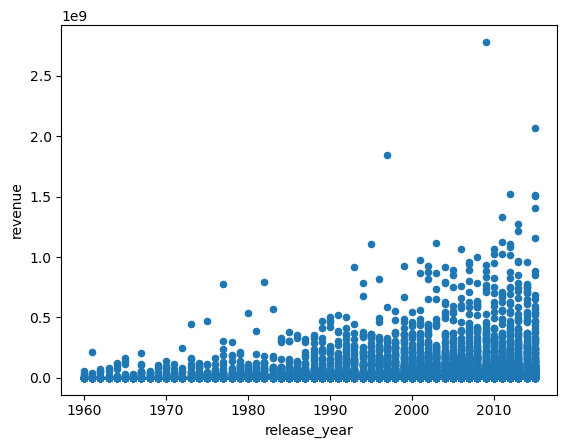

In [217]:
df.plot(x = 'release_year', y = 'revenue', kind = 'scatter');

After plotting a scatter plot of `revenue` and `vote_count`, it can be observed that the plot has a lot of outliers
This may mean that this feature does not exactly define if the movie has higher revenues.

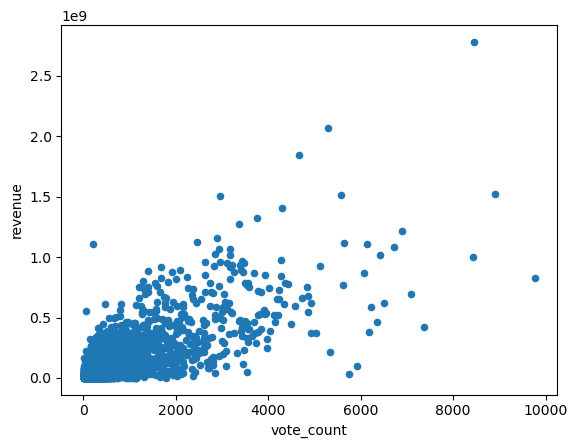

In [218]:
df.plot(x = 'vote_count', y = 'revenue', kind = 'scatter');

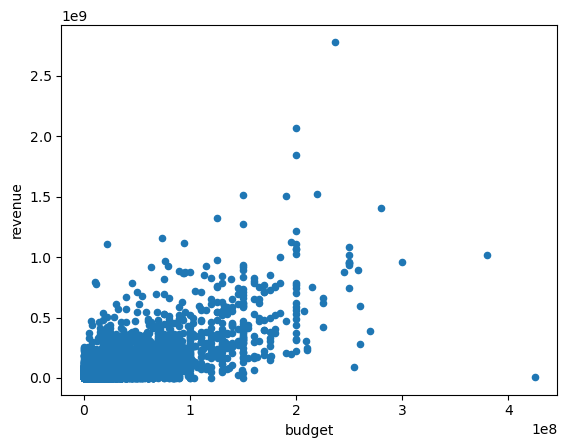

In [219]:
df.plot(x = 'budget', y = 'revenue', kind = 'scatter');

<a id='conclusions'></a>
## Conclusions
In the data analysis above, I have explored the movies data with a set of given features. The dataset has the following information related to movies. The data analysis process carried out on this dataset includes asking question, wrangling, cleaning and exploratory data analysis.

In answering the question about what genres of movie are popular from year to year, I was able to generate a dataframe  that groups the movie data by year, genre and popularity. To get the most popular genres in each year, I then went ahead to select the ones that the popularity is more than the median value of `popularity`. This gives us a list of all years, the genres and the popularity mean. 

Also, in order to determine which feature are associated with moview that has high revenue, I plotted a scatter plots of revenue against some of these features to see their correlation.

#### Results
The following can be concluded from the data analysis done above. 
1. There is a strong orrelation between revenue and release_year. From the scatter plot, we can see that revenue gotten from movies significantly increased over the year.
2. There is a strong relationship between revenue and budget.


#### Limitations
There are some limitations observed while working with this dataset to answer the questions.
1. The genres column has values that separated by pipe: There is a large combination of available genres we can have on this data. This is gotten by performing nunique() operation on the genre column. If the combinations of genres aren't this much, I could have been able to streamline the analysis to understand which exact genre is more popular. I couldn't explore the genre feature to this extent.
2. During data access, it is observed that some features does not exactly have any correlation with answering the questions we are addressing on this data. Such has `homepage`, `keyword`, `production_company`. These columns also have very high null values in the dataset, therefore, they cannot be used during analysis. 

